In [18]:
import pandas as pd
import numpy as np
df = pd.read_csv('TeamStats_2003_2019.csv')
df.Team.unique()

array(['Arsenal', 'Chelsea', 'Manchester Utd', 'Liverpool',
       'Newcastle Utd', 'Aston Villa', 'Charlton Ath', 'Bolton', 'Fulham',
       'Birmingham City', 'Middlesbrough', 'Southampton', 'Portsmouth',
       'Tottenham', 'Blackburn', 'Manchester City', 'Everton',
       'Leicester City', 'Leeds United', 'Wolves', 'West Brom',
       'Crystal Palace', 'Norwich City', 'West Ham', 'Wigan Athletic',
       'Sunderland', 'Reading', 'Sheffield Utd', 'Watford',
       'Derby County', 'Stoke City', 'Hull City', 'Burnley', 'Blackpool',
       'Swansea City', 'QPR', 'Cardiff City', 'Bournemouth', 'Brighton',
       'Huddersfield'], dtype=object)

In [19]:
df_Arsenal = df.loc[df['Team'] == 'Arsenal']
df_Tottenham = df.loc[df['Team'] == 'Tottenham']
df_WestHam = df.loc[df['Team'] == 'West Ham']

In [20]:
df_Arsenal.insert(13,"Relocation", "Pre")
df_Tottenham.insert(13,"Relocation", "Pre")
df_WestHam.insert(13,"Relocation", "Pre")

In [21]:
df_Arsenal.loc[(df_Arsenal.Year > 2005),'Relocation']='Post'
df_WestHam.loc[(df_WestHam.Year > 2015),'Relocation']='Post'
df_Tottenham.loc[(df_Tottenham.Year > 2016),'Relocation']='Post'

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [22]:
df_Tottenham.head(19)

,Year,rank,Team,games,wins,draws,losses,goals_for,goals_against,goal_diff,points,attendance_per_g,winperc,Relocation
13,2003,14,Tottenham,38,13,6,19,47,57,-10,45,34876,0.342105,Pre
28,2004,9,Tottenham,38,14,10,14,47,41,6,52,35873,0.368421,Pre
44,2005,5,Tottenham,38,18,11,9,53,38,15,65,36074,0.473684,Pre
64,2006,5,Tottenham,38,17,9,12,57,54,3,60,35739,0.447368,Pre
90,2007,11,Tottenham,38,11,13,14,66,61,5,46,35967,0.289474,Pre
107,2008,8,Tottenham,38,14,9,15,45,45,0,51,35929,0.368421,Pre
123,2009,4,Tottenham,38,21,7,10,67,41,26,70,35794,0.552632,Pre
144,2010,5,Tottenham,38,16,14,8,55,46,9,62,35704,0.421053,Pre
163,2011,4,Tottenham,38,20,9,9,66,41,25,69,36036,0.526316,Pre
184,2012,5,Tottenham,38,21,9,8,66,46,20,72,36066,0.552632,Pre


In [23]:
df_ArsenalTrim = df_Arsenal[["Relocation","winperc"]]
df_WestHamTrim = df_WestHam[["Relocation","winperc"]]
df_TottenhamTrim = df_Tottenham[["Relocation","winperc"]]

In [24]:
df_Arsenal["attendance_per_g"] = pd.to_numeric(df_Arsenal["attendance_per_g"])
df_WestHam["attendance_per_g"] = pd.to_numeric(df_WestHam["attendance_per_g"])
df_Tottenham["attendance_per_g"] = pd.to_numeric(df_Tottenham["attendance_per_g"])

df_ArsenalTrimAtt = df_Arsenal[["Relocation","attendance_per_g"]]
df_WestHamTrimAtt = df_WestHam[["Relocation","attendance_per_g"]]
df_TottenhamTrimAtt = df_Tottenham[["Relocation","attendance_per_g"]]

C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Owner\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [25]:
df_ArsenalTrim = df_ArsenalTrim.groupby('Relocation')['winperc'].mean().reset_index()
df_WestHamTrim = df_WestHamTrim.groupby('Relocation')['winperc'].mean().reset_index()
df_TottenhamTrim = df_TottenhamTrim.groupby('Relocation')['winperc'].mean().reset_index()

In [26]:
df_ArsenalTrimAtt = df_ArsenalTrimAtt.groupby('Relocation')['attendance_per_g'].mean().reset_index()
df_WestHamTrimAtt = df_WestHamTrimAtt.groupby('Relocation')['attendance_per_g'].mean().reset_index()
df_TottenhamTrimAtt = df_TottenhamTrimAtt.groupby('Relocation')['attendance_per_g'].mean().reset_index()

In [27]:
df_ArsenalTrim.insert(2,"Team", "Arsenal")
df_WestHamTrim.insert(2,"Team", "WestHam")
df_TottenhamTrim.insert(2,"Team", "Tottenham")

In [28]:
df_ArsenalTrimAtt.insert(2,"Team", "Arsenal")
df_WestHamTrimAtt.insert(2,"Team", "WestHam")
df_TottenhamTrimAtt.insert(2,"Team", "Tottenham")

In [29]:
df_winperc = pd.concat([df_ArsenalTrim, df_WestHamTrim, df_TottenhamTrim])

In [30]:
df_attend = pd.concat([df_ArsenalTrimAtt, df_WestHamTrimAtt, df_TottenhamTrimAtt])

In [31]:
df_attend['avg_attendance_per_g'] = df_attend['attendance_per_g'].apply(np.floor)

In [32]:
del df_attend['attendance_per_g']

In [33]:
df_attend

,Relocation,Team,avg_attendance_per_g
0,Post,Arsenal,59071.0
1,Pre,Arsenal,38080.0
0,Post,WestHam,54087.0
1,Pre,WestHam,34313.0
0,Post,Tottenham,55308.0
1,Pre,Tottenham,35500.0


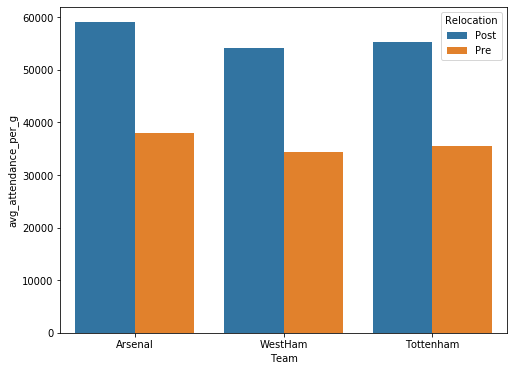

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,6]


sns.barplot(x='Team', y = 'avg_attendance_per_g', hue = 'Relocation', data =df_attend)